# Exploring datasets

The main purpose of this notebook is to demonstrate the amount, the features, and differences of the data sets. 

## Table of contents

- Materials project
- Citrine Informatics
- The Materials Platform for Data Science (MPDS)
- The Materials Data Fascility
- 

The notebook is highly inspired by the notebook https://nbviewer.jupyter.org/github/hackingmaterials/matminer_examples/blob/master/matminer_examples/data_retrieval-nb/data_retrieval_basics.ipynb

# Materials project

The Materials Project offers a variety of properties of hundreds of thousands of inorganic crystalline materials. Almost all Materials Project data is calculated using a theoretical technique called Density Functional Theory.
A few notes about DFT: 
 - DFT is a first-principles method. This means that it uses a minimum of empirical information, so it can handle unusual systems well, including materials that have never been synthesized! It scales well to several hundred atoms, but beyond that other methods need to be used.

 - However, DFT does still need some form of correction. The particular type of DFT used in Materials Project (GGA/PBE) systematically under-binds materials, meaning that bond lengths (and hence lattice parameters) are systematically larger than expected by 1-2%. This also results in a systematic error in our formation energies, but we can fix this systematic error by fitting our calculated data to experimental formation enthalpies.

 - DFT is a ground-state, 0 K method. It can calculate ground state properties well such as bulk modulus, along with electronic structure information (the shape of your band structures, for example) but it is notably bad at calculating excited states including band gaps, and systematically under-estimates band gaps by a large margin. For this reason, any screening based on band gap has to include a large safety margin of ~0.5 eV. 
 
(Ref: https://workshop.materialsproject.org/lessons/01_website_walkthrough/website_walkthrough/ 20.08.2020)

### Materials Project object notation 
Originally, all responses from the project are in the Javascript Object Notation (JSON), which is similar to a dictionary in Python, with examples like one possible structure of [carbon](https://wiki.materialsproject.org/images/9/9d/C_structure.txt) or [Fe$_2$O$_3$ ](https://wiki.materialsproject.org/images/e/ee/Fe2O3.txt) (https://wiki.materialsproject.org/).

### Libraries used to extract data
One method to extract data from Materials Project is using pymatgen´s interface to the Materials Project API. Another tool that is made based on Materials Project is the Python library matminer. Works well with pandas, and is used to extract features from materials and use machine learning such as SciKit-Learn. 
https://hackingmaterials.lbl.gov/matminer/ (20.08.2020)
Examples and jupyter notebooks using matminer is found here: 
https://nbviewer.jupyter.org/github/hackingmaterials/matminer_examples/blob/master/matminer_examples/index.ipynb

## Data 
Materials project is built upon over 60 features, while some features being irrelevant for some materials while fundamental for others. A complete overview of features are found on [MAPI Github site](https://github.com/materialsproject/mapidoc/tree/master/materials). 
The data is divided into three branches, named 
- materials (calculated materials data)
    - Basic properties
- materials (experimental data)
    - Experimental thermochemical information (1 feature using pymatgen)
- tasks (detailed calculation data)
    - information about a particular calculation

In the next few cells, we add the features that are included in the [documentation to MP](https://materialsproject.org/docs/api#materials_.28calculated_materials_data.29). Some of the features are included in both basic calculation and detailed calculation. 

### Basic Properties

In [1]:
import pandas
from pandas import DataFrame
pandas.options.display.max_colwidth = 200
MP_basic_properties = DataFrame({
     "features":["pretty_formula","unit_cell_formula","icsd_ids","energy","energy_per_atom","volume","density","nsites","elements","nelements","spacegroup","initial_structure","final_structure","structure","cif","#Thermodynamic properties","formation_energy_per_atom","e_above_hull","elasticity","piezo","diel","is_hubbard","hubbards","is_compatible","#Electronic structure", "band_gap","dos","bandstructure","bandstructure_uniform","#Others","entry","total_magnetization"],
     "descriptions":["A nice formula where the element amounts are normalized","The full explicit formula for the unit cell","List of Inorganic Crystal Structure Database (ICSD) ids for structures that have been deemed to be structurally similar to this material based on pymatgen's StructureMatcher algorithm, if any.", "Calculated vasp energy for structure","Final relaxed volume of the material","Calculated vasp energy normalized to per atom in the unit cell","Final relaxed density of the material","Number of sites in the unit cell","A array of the elements in the material","The number of elements in the material","An associative array containing basic space group information","The initial input structure for the calculation in the pymatgen json representation","The final relaxed structure in the pymatgen json representation","An alias for final_structure","A string containing the structure in the CIF format","Calculated formation energy from the elements normalized to per atom in the unit cell", "Calculated energy above convex hull for structure. Please see Phase Diagram Manual for the interpretation of this quantity", "Mechanical properties in the elastic limit. Contains the full elastic tensor as well as derived properties, e.g. Poisson ratio and bulk (K) and shear (G) moduli. Consult our hierarchical documentation for the particular names of sub-keys.","","Piezoelectric properties. Contains a tensor and derived properties. Again, consult our repository for the names of sub-keys.", "Dielectric properties. Contains a tensor (one each for total and electronic contribution) and derived properties, e.g. dielectric constant, refractive index, and recognized potential for ferroelectricity.", "A boolean indicating whether the structure was calculated using the Hubbard U extension to DFT","An array of Hubbard U values, where applicable.", "Whether this calculation is considered compatible under the GGA/GGA+U mixing scheme.", "","The calculated band gap", "The calculated density of states in the pymatgen json representation", "The calculated line mode band structure (along selected symmetry lines -- aka branches, e.g. \Gamma to Z -- in the Brillouin zone) in the pymatgen json representation", "The calculated uniform band structure in the pymatgen json representation", "", "This is a special property that returns a pymatgen ComputedEntry in the json representation. ComputedEntries are the basic unit for many structural and thermodynamic analyses in the pymatgen code base.","total magnetic moment of the unit cell"]
     })
MP_basic_properties

,features,descriptions
0,pretty_formula,A nice formula where the element amounts are normalized
1,unit_cell_formula,The full explicit formula for the unit cell
2,icsd_ids,"List of Inorganic Crystal Structure Database (ICSD) ids for structures that have been deemed to be structurally similar to this material based on pymatgen's StructureMatcher algorithm, if any."
3,energy,Calculated vasp energy for structure
4,energy_per_atom,Final relaxed volume of the material
5,volume,Calculated vasp energy normalized to per atom in the unit cell
6,density,Final relaxed density of the material
7,nsites,Number of sites in the unit cell
8,elements,A array of the elements in the material
9,nelements,The number of elements in the material


### Detailed calculation data

In [2]:
MP_detailed_calculation_data = DataFrame({
     "features":["pretty_formula", "unit_cell_formula", "icsd_id", "energy", "energy_per_atom", "volume", "density", "nsites", "elements", "nelements", "initial_structure", "final_structure", "structure", "#Thermodynamic properties", "formation_energy_per_atom", "e_above_hull", "#Calculation parameters", "is_hubbard", "hubbards", "is_compatible", "#lectronic structure", "band_gap", "dos", "incar","kpoints", "potcar"],
     "descriptions":["A nice formula where the element amounts are normalized", "The full explicit formula for the unit cell", "The Inorganic Crystal Structure Database id for the initial structure, if any.", "Calculated vasp energy for structure", "Calculated vasp energy normalized to per atom in the unit cell", "Final relaxed volume of the material", "Final relaxed density of the material", "Number of sites in the unit cell", "A array of the elements in the material", "The number of elements in the material", "The initial input structure for the calculation in the pymatgen json representation", "The final relaxed structure in the pymatgen json representation", "An alias for final_structure", "", "Calculated formation energy from the elements normalized to per atom in the unit cell", "Calculated energy above convex hull for structure. Please see Phase Diagram Manual for the interpretation of this quantity", "", "A boolean indicating whether the structure was calculated using the Hubbard U extension to DFT", "An array of Hubbard U values, where applicable.", "Whether this calculation is considered compatible under the GGA/GGA+U mixing scheme.", "", "The calculated band gap","The calculated density of states in the pymatgen json representation", "The INCAR parameters used for the run.", "The KPOINTS grid used for the run.", "The pseudopotentials used for the run."]
     })
MP_detailed_calculation_data

,features,descriptions
0,pretty_formula,A nice formula where the element amounts are normalized
1,unit_cell_formula,The full explicit formula for the unit cell
2,icsd_id,"The Inorganic Crystal Structure Database id for the initial structure, if any."
3,energy,Calculated vasp energy for structure
4,energy_per_atom,Calculated vasp energy normalized to per atom in the unit cell
5,volume,Final relaxed volume of the material
6,density,Final relaxed density of the material
7,nsites,Number of sites in the unit cell
8,elements,A array of the elements in the material
9,nelements,The number of elements in the material


## Examples retreiving data from MaterialsProject

### Finding number of ABO$_3$ structures.

In [3]:
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

In [4]:
mpdr = MPDataRetrieval("b7RtVfJTsUg6TK8E")

In [5]:
df = mpdr.get_dataframe(criteria   = {"formula_anonymous": "ABC3", "band_gap": {"$gt": 2.0}}, 
                        properties=["density", "pretty_formula", "icsd_id", "band_gap"])
print("There are {} entries on MP for the anonymous formula ABO3 with bandgap larger than 2.0 eV".format(len(df['density'])))
df.head()

There are 1155 entries on MP for the anonymous formula ABO3 with bandgap larger than 2.0 eV


,density,pretty_formula,icsd_id,band_gap
material_id,,,,
mp-1017439,5.371420,SrSiO3,None,2.4638
mp-10175,3.873116,KCdF3,None,3.5644
mp-1017626,3.245991,LiCaF3,None,6.5265
mp-1019544,5.983317,BaZrO3,None,3.1177
mp-1020115,3.028081,MgSiO3,None,4.5433


### Finding density of state (DOS) for SiC

In [6]:
df = mpdr.get_dataframe(criteria={"pretty_formula": "SiC", "e_above_hull": {"$lt": 1e-6}}, 
                        properties=["density", "pretty_formula", "icsd_id", "bandstructure", "band_gap", "dos"])
df.head()

,density,pretty_formula,icsd_id,bandstructure,band_gap,dos
material_id,,,,,,
mp-568656,3.171908,SiC,None,<pymatgen.electronic_structure.bandstructure.BandStructureSymmLine object at 0x7f93b0d23048>,2.0411,Complete DOS for Full Formula (Si10 C10)\nReduced Formula: SiC\nabc : 3.094655 3.094655 25.309100\nangles: 90.000000 90.000000 120.000019\nSites (20)\n # SP a b ...


In /home/oliver/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/oliver/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/oliver/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/oliver/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/oliver/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

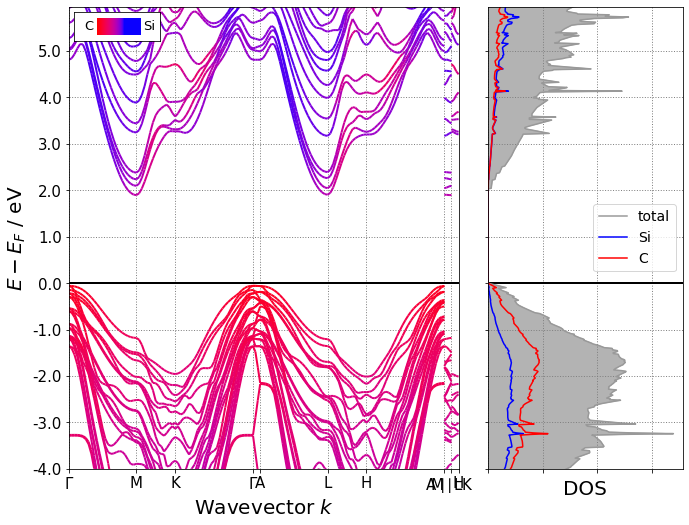

In [7]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSDOSPlotter

mpid = 'mp-568656'
idx = df.index[df.index==mpid][0]
plt = BSDOSPlotter().get_plot(bs=df.loc[idx, 'bandstructure'], dos=df.loc[idx, 'dos']);
plt.show()

# Citrine Informatics

Citrine informatics specializes in the fields of big data, artificial intelligence, and machine learning. They have an open platform for universities and researchers described [here](https://citrine.io/research/open-citrination-platform/), and an extensive [documentation guide](https://citrineinformatics.github.io/python-citrination-client/index.html).

//TODO: Check with realfagsbiblioteket for access. 

In [8]:
from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
pandas.options.display.max_columns = None
cdr = CitrineDataRetrieval(api_key="ndMRkR5d8Wf4brRH0j0iCgtt") # or CitrineDataRetrieval(api_key=YOUR_API_KEY) if $CITRINE_KEY is not set

In [9]:
df = cdr.get_dataframe(criteria={'formula':'SiC', 'data_type': 'Experimental'}, 
                       properties=['Band gap'],
                       secondary_fields=True)
pandas.options.display.max_columns = None
df.head()

  0%|          | 0/7 [00:00<?, ?it/s]/home/oliver/.local/lib/python3.6/site-packages/matminer/data_retrieval/retrieve_Citrine.py:103: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead

100%|██████████| 7/7 [00:00<00:00, 67.11it/s]

all available fields:
['Thermoluminescence-dataType', 'Thermoluminescence-conditions', 'Temperature derivative of band gap-methods', 'uid', 'Band gap', 'chemicalFormula', 'Phase', 'Electroluminescence-dataType', 'Temperature derivative of band gap-conditions', 'Band gap-methods', 'Photoluminescence-dataType', 'Photoluminescence', 'Thermoluminescence', 'Band gap-dataType', 'Temperature derivative of band gap-dataType', 'Color-conditions', 'Color-dataType', 'Color', 'category', 'Temperature derivative of band gap', 'Band gap-units', 'Electroluminescence-conditions', 'Crystallinity', 'references', 'Photoluminescence-conditions', 'Temperature derivative of band gap-units', 'Band gap-conditions', 'Electroluminescence']

suggested common fields:
['references', 'chemicalFormula', 'Crystallinity', 'Phase', 'Band gap', 'Band gap-units', 'Band gap-conditions', 'Band gap-methods', 'Band gap-dataType', 'Electroluminescence', 'Electroluminescence-conditions', 'Electroluminescence-dataType', 'Photol

,references,chemicalFormula,Crystallinity,Phase,Band gap,Band gap-units,Band gap-conditions,Band gap-methods,Band gap-dataType,Electroluminescence,Electroluminescence-conditions,Electroluminescence-dataType,Photoluminescence,Photoluminescence-conditions,Photoluminescence-dataType,Thermoluminescence,Thermoluminescence-conditions,Thermoluminescence-dataType,Temperature derivative of band gap,Temperature derivative of band gap-units,Temperature derivative of band gap-conditions,Temperature derivative of band gap-methods,Temperature derivative of band gap-dataType,Color,Color-conditions,Color-dataType
1,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,3.33,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,2.86,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,4.4,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Direct'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Estimated'},EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Cubic,2.39,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Excitonic'}]}, {'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,2.86,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00033,eV/K,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,NaN,NaN,NaN


In [10]:
df.head(3)

,references,chemicalFormula,Crystallinity,Phase,Band gap,Band gap-units,Band gap-conditions,Band gap-methods,Band gap-dataType,Electroluminescence,Electroluminescence-conditions,Electroluminescence-dataType,Photoluminescence,Photoluminescence-conditions,Photoluminescence-dataType,Thermoluminescence,Thermoluminescence-conditions,Thermoluminescence-dataType,Temperature derivative of band gap,Temperature derivative of band gap-units,Temperature derivative of band gap-conditions,Temperature derivative of band gap-methods,Temperature derivative of band gap-dataType,Color,Color-conditions,Color-dataType
1,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,3.33,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '4.2'}], 'units': 'K'}",EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,2.86,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Indirect'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Absorption'},EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,True,"{'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}",EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[{'doi': '10.1063/1.3253115'}],Si1C1,Single crystalline,Hexagonal,4.4,eV,"[{'name': 'Transition', 'scalars': [{'value': 'Direct'}]}, {'name': 'Temperature', 'scalars': [{'value': '300'}], 'units': 'K'}]",{'name': 'Estimated'},EXPERIMENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The materials platform for Data Science

The PAULING FILE is the relational database for materials scientists, grouping crystallographic data, phase diagrams, and physical properties of inorganic crystalline substances under the same frame. Its focus is put on the experimental observations, and the data are processed from the original publications, covering world scientific literature from 1891 to the present date. Each individual crystal structure, phase diagram, or physical property database entry originates from a particular publication. 

The MPDS is not the only product based on the PAULING FILE. There are others, such as SpringerMaterials, NIMS AtomWork, MedeA etc. More information can be found at the PAULING FILE website.

Full access to all the data in all the supported formats (CIF, PDF, PNG, BIBTEX etc.) is provided by the subscription. Free access is also possible although limited. In addition, some parts of the data are open-access. In particular, these are: 


    (a) cell parameters - temperature diagrams and cell parameters - pressure diagrams, 
    (b) all data for compounds containing both Ag and K, 
    (c) all data for binary compounds of oxygen.
    

Realfagsbiblioteket does not have access.

In [11]:
from matminer.data_retrieval.retrieve_MPDS import MPDSDataRetrieval
mpdsdr = MPDSDataRetrieval(api_key="OzBgjyJIWYmtgks8oDETBiusOSIk6DImmqV4qdd7t558Kibh")

In [12]:
df = mpdsdr.get_dataframe(criteria={"elements": "K-Ag", "props": "heat capacity"})
df


Got 6 hits


,Phase,Formula,SG,Entry,Property,Units,Value
0,35278,KAg4I5 rt,213,P1201629-3,heat capacity at constant pressure,J K-1 g-at.-1,30.50
1,91357,K2NaAg3[CN]6 lt,12,P1307433-3,heat capacity at constant pressure,J K-1 g-at.-1,83.00
2,91357,K2NaAg3[CN]6 lt,12,P1307433-4,heat capacity at constant pressure,J K-1 g-at.-1,112.00
3,91357,K2NaAg3[CN]6 lt,12,P1307434-3,heat capacity at constant pressure,J K-1 g-at.-1,78.00
4,91357,K2NaAg3[CN]6 lt,12,P1307434-4,heat capacity at constant pressure,J K-1 g-at.-1,11.00
5,129509,KAg1.15Fe0.85Te2,139,P1422629-7,coefficient of third-order term in heat capacity,mJ K-4 mol-1,3.11


# MDF - The Materials Data Facility

In [13]:
from matminer.data_retrieval.retrieve_MDF import MDFDataRetrieval

In [21]:

mdf_dr = MDFDataRetrieval(anonymous=True) # Or anonymous=False if you have a Globus login

df = mdf_dr.get_dataframe(criteria={'elements': ['Ag', 'Be'], 'sources': ["oqmd"]})
df.columns

Index(['crystal_structure.number_of_atoms',
       'crystal_structure.space_group_number', 'crystal_structure.volume',
       'dft.converged', 'dft.cutoff_energy',
       'dft.exchange_correlation_functional', 'files.0.data_type',
       'files.0.filename', 'files.0.globus', 'files.0.length',
       'files.0.mime_type', 'files.0.sha512', 'files.0.url',
       'material.composition', 'material.elements.0', 'material.elements.1',
       'mdf.ingest_date', 'mdf.resource_type', 'mdf.scroll_id',
       'mdf.source_id', 'mdf.source_name', 'mdf.version',
       'oqmd.band_gap.units', 'oqmd.band_gap.value', 'oqmd.configuration',
       'oqmd.delta_e.units', 'oqmd.delta_e.value',
       'oqmd.magnetic_moment.units', 'oqmd.stability.units',
       'oqmd.stability.value', 'oqmd.total_energy.units',
       'oqmd.total_energy.value', 'oqmd.volume_pa.units',
       'oqmd.volume_pa.value', 'crystal_structure.cross_reference.icsd',
       'jarvis.bandgap.optb88vdw', 'jarvis.crossreference.materials_pr

In [22]:
df.head()

,crystal_structure.number_of_atoms,crystal_structure.space_group_number,crystal_structure.volume,dft.converged,dft.cutoff_energy,dft.exchange_correlation_functional,files.0.data_type,files.0.filename,files.0.globus,files.0.length,files.0.mime_type,files.0.sha512,files.0.url,material.composition,material.elements.0,material.elements.1,mdf.ingest_date,mdf.resource_type,mdf.scroll_id,mdf.source_id,mdf.source_name,mdf.version,oqmd.band_gap.units,oqmd.band_gap.value,oqmd.configuration,oqmd.delta_e.units,oqmd.delta_e.value,oqmd.magnetic_moment.units,oqmd.stability.units,oqmd.stability.value,oqmd.total_energy.units,oqmd.total_energy.value,oqmd.volume_pa.units,oqmd.volume_pa.value,crystal_structure.cross_reference.icsd,jarvis.bandgap.optb88vdw,jarvis.crossreference.materials_project,jarvis.dimensionality,jarvis.formation_enthalpy,jarvis.id,jarvis.landing_page,jarvis.total_energy,origin.creator,origin.name,origin.type,jarvis.bandgap.mbj,material.elements.2,oqmd.magnetic_moment.value
0,4,139,40.6980,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",71045.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/71045.json,11283,text/plain,793a453655aaac5bc05a04b0b6b017126d099be3129e6e60dda03aa21c532630769cc2021355a05bb5ad5a61bd187d28605ccf07574f712e3a0dcac36dd78d07,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/71045.json,Ag1Be3,Ag,Be,2018-11-09T19:44:43.687681Z,record,190127,oqmd_v13.13,oqmd,13,eV,0.0,standard,eV/atom,0.201601,bohr/atom,eV/atom,0.201601,eV/atom,-3.320249,angstrom^3/atom,10.17450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,225,40.8748,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",113627.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/113627.json,11526,text/plain,5f2a5b57a4e55d479648deee2799b78deabacda07c7141d10326b3f31bb05698f74ccea1c9e030572343911af24fcd0828959f9b0e0927d1d706ed307e3e1db7,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/113627.json,Ag1Be3,Ag,Be,2018-11-09T19:44:43.687681Z,record,178146,oqmd_v13.13,oqmd,13,eV,0.0,standard,eV/atom,0.222443,bohr/atom,eV/atom,0.222443,eV/atom,-3.299407,angstrom^3/atom,10.21870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,221,24.0794,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",86132.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/86132.json,11014,text/plain,0ec94f3d9758dbe490ab783e96ad3c5fe38407eba76e8e1ab0117e5888212e37e2fa5b1ee1a0e3c4ddfe986626ce413732f3a0d30e85ca6e124df2b9575c7f8a,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/86132.json,Ag1Be1,Ag,Be,2018-11-09T19:44:43.687681Z,record,45273,oqmd_v13.13,oqmd,13,eV,0.0,standard,NaN,NaN,bohr/atom,NaN,NaN,eV/atom,-3.105143,angstrom^3/atom,12.03970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,227,64.7135,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",5801.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/5801.json,11730,text/plain,8195cd6b522bced6b7cebcadec0b729d2001e75a6f62f690823c1e4a22f0729b83881671ce8f254033062a08fc5baf4c7b4db660339cbf3fd6e957a05cadc0a5,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/5801.json,Ag1Be2,Ag,Be,2018-11-09T19:44:43.687681Z,record,385981,oqmd_v13.13,oqmd,13,eV,0.0,static,eV/atom,0.027908,bohr/atom,eV/atom,0.027908,eV/atom,-3.416156,angstrom^3/atom,10.78560,57347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,139,114.8740,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",122084.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/122084.json,12038,text/plain,170adc0a7c6e09c49ab34431a0b9a571d51d63adc30a620bf9b4f6cfd38b2467f5fc7bf0d35596e96217aeebd867e266

In [16]:
print("There are {} entries in the Ag-Be chemical system".format(len(df)))


There are 421 entries in the Ag-Be chemical system


In [17]:
df = mdf_dr.get_dataframe(criteria={'elements': ['Si', 'C'], 'sources': ["oqmd"]})

In [18]:
df.head()

,crystal_structure.cross_reference.icsd,crystal_structure.number_of_atoms,crystal_structure.space_group_number,crystal_structure.volume,dft.converged,dft.cutoff_energy,dft.exchange_correlation_functional,files.0.data_type,files.0.filename,files.0.globus,files.0.length,files.0.mime_type,files.0.sha512,files.0.url,material.composition,material.elements.0,material.elements.1,mdf.ingest_date,mdf.resource_type,mdf.scroll_id,mdf.source_id,mdf.source_name,mdf.version,oqmd.band_gap.units,oqmd.band_gap.value,oqmd.configuration,oqmd.delta_e.units,oqmd.delta_e.value,oqmd.magnetic_moment.units,oqmd.stability.units,oqmd.stability.value,oqmd.total_energy.units,oqmd.total_energy.value,oqmd.volume_pa.units,oqmd.volume_pa.value,nist_xps_db.binding_energy_ev,nist_xps_db.energy_uncertainty_ev,nist_xps_db.notes,nist_xps_db.temperature_k,cip.bv,cip.energy,cip.forcefield,cip.gv,cip.mpid,cip.totenergy,jarvis.bandgap.mbj,jarvis.bandgap.optb88vdw,jarvis.crossreference.materials_project,jarvis.dimensionality,jarvis.elastic_moduli.bulk,jarvis.elastic_moduli.shear,jarvis.formation_enthalpy,jarvis.id,jarvis.landing_page,jarvis.total_energy,origin.creator,origin.name,origin.type,crystal_structure.stoichiometry,material.elements.2,material.elements.3,oqmd.magnetic_moment.value,material.elements.4,material.elements.5,material.elements.6,material.elements.7,material.elements.8,material.elements.9,material.elements.10,material.elements.11,material.elements.12,material.elements.13,material.elements.14
0,15325.0,12.0,186.0,125.2680,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",533706.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/533706.json,11770,text/plain,3d7f85a326db7937c1242992095c4bad531d9a76e6b128938f2feb20130bed2c694d28f161b8f2b6387d4a121277248dd7149fdb62d15c3ca8e05442750cabba,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/533706.json,C1Si1,C,Si,2018-11-09T19:44:43.687681Z,record,171968,oqmd_v13.13,oqmd,13,eV,2.152,static,eV/atom,-0.208905,bohr/atom,eV/atom,-0.206994,eV/atom,-7.529889,angstrom^3/atom,10.43900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,221.0,18.3050,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",85999.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/85999.json,11532,text/plain,1d9fb5f7c7f7fafc0dafd3c2cbe5a0396e2bcb00b0a7342153ea4d50e4a7763fc6e5f40dde50777343d854954d73d56cbb172552f669f1dbc65636a167c1ecb9,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/85999.json,C1Si1,C,Si,2018-11-09T19:44:43.687681Z,record,190761,oqmd_v13.13,oqmd,13,eV,0.000,standard,NaN,NaN,bohr/atom,NaN,NaN,eV/atom,-5.452403,angstrom^3/atom,9.15252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24217.0,2.0,216.0,20.8764,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",12480.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data/oqmd_v13/12480.json,10986,text/plain,73710eafb570e5930feb83d617f616240e5a3c02ca517b2545f76527569292b4d19e34729a9336e75ab9b28fd5316b7a63264b9850dcabcd6f0ff347dc915a19,https://e38ee745-6d04-11e5-ba46-22000b92c6ec.e.globus.org/MDF/mdf_connect/prod/data/oqmd_v13/12480.json,C1Si1,C,Si,2018-11-09T19:44:43.687681Z,record,193699,oqmd_v13.13,oqmd,13,eV,1.555,NaN,NaN,NaN,bohr/atom,NaN,NaN,eV/atom,-7.529171,angstrom^3/atom,10.43820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38150.0,20.0,156.0,208.6390,True,520.0,PBE,"ASCII text, with very long lines, with no line terminators",15852.json,globus://e38ee745-6d04-11e5-ba46-22000b92c6ec/MDF/mdf_connect/prod/data